In [71]:
# Installing packages

In [72]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
# !pip install wordcloud
# !pip install tqdm

In [73]:
# Importing Packages

In [74]:
import warnings
import pandas as pd
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle
import os

In [75]:
# Adding the dataset into the csv

In [76]:
# url = 'https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv'
# data_df = pd.read_csv(url , header=None)
# data_df.to_csv('tweets.csv', mode='a', index=False, header=not os.path.isfile('tweets.csv'))
# data_df

In [77]:
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('tweets.csv' , header=None)
df

,0,1,2,3
0,Steven Cohen,"Apr 9, 2024 · 3:29 PM UTC",Positive,It should be a great day at the ballpark on Su...
1,Chris Christie,"Apr 7, 2024 · 9:10 PM UTC",Positive,Way to go .@RegueroKatia The only way to respo...
2,Chris Christie,"Apr 5, 2024 · 2:30 PM UTC",Negative,A few moments ago our entire house shook for a...
3,Chris Christie,"Mar 28, 2024 · 2:01 AM UTC",Neutral,“I appreciate the encouragement I’ve gotten to...
4,Chris Christie,"Mar 28, 2024 · 2:00 AM UTC",Positive,I am sad to lose him as a friend and as an exa...
...,...,...,...,...
84252,Nitish Kumar,"Mar 11, 2024 · 2:27 PM UTC",Neutral,Seven people of Sitamarhi died in a road accid...
84253,Nitish Kumar,"Mar 10, 2024 · 7:34 PM UTC",Neutral,"In Britain, I met India's High Commissioner Mr..."
84254,Nitish Kumar,"Mar 8, 2024 · 5:39 PM UTC",Neutral,"In order to visit London, he revolted the Scie..."
84255,Nitish Kumar,"Mar 8, 2024 · 5:38 PM UTC",Neutral,"In order to visit London, he revolted the Scie..."


In [79]:
df = df[[2,3]].reset_index(drop = True)
df

,2,3
0,Positive,It should be a great day at the ballpark on Su...
1,Positive,Way to go .@RegueroKatia The only way to respo...
2,Negative,A few moments ago our entire house shook for a...
3,Neutral,“I appreciate the encouragement I’ve gotten to...
4,Positive,I am sad to lose him as a friend and as an exa...
...,...,...
84252,Neutral,Seven people of Sitamarhi died in a road accid...
84253,Neutral,"In Britain, I met India's High Commissioner Mr..."
84254,Neutral,"In order to visit London, he revolted the Scie..."
84255,Neutral,"In order to visit London, he revolted the Scie..."


In [80]:
df.columns = ['sentiment', 'text']
df

,sentiment,text
0,Positive,It should be a great day at the ballpark on Su...
1,Positive,Way to go .@RegueroKatia The only way to respo...
2,Negative,A few moments ago our entire house shook for a...
3,Neutral,“I appreciate the encouragement I’ve gotten to...
4,Positive,I am sad to lose him as a friend and as an exa...
...,...,...
84252,Neutral,Seven people of Sitamarhi died in a road accid...
84253,Neutral,"In Britain, I met India's High Commissioner Mr..."
84254,Neutral,"In order to visit London, he revolted the Scie..."
84255,Neutral,"In order to visit London, he revolted the Scie..."


In [81]:
df.isnull().sum()
print(df.shape)


(84257, 2)


In [82]:
df.dropna(inplace=True)
df = df[df['text'].apply(len)>5]
print(df.shape)


(81452, 2)


In [83]:
df.sentiment.value_counts()

sentiment
Negative      23983
Positive      23056
Neutral       21501
Irrelevant    12912
Name: count, dtype: int64

In [84]:
df = ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [85]:
df.head(3)

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,It should be a great day at the ballpark on Su...,111,28,3.964286,14,1,0,3,0
1,Positive,Way to go .@RegueroKatia The only way to respo...,221,45,4.911111,21,0,0,5,0
2,Negative,A few moments ago our entire house shook for a...,97,24,4.041667,12,0,0,3,2


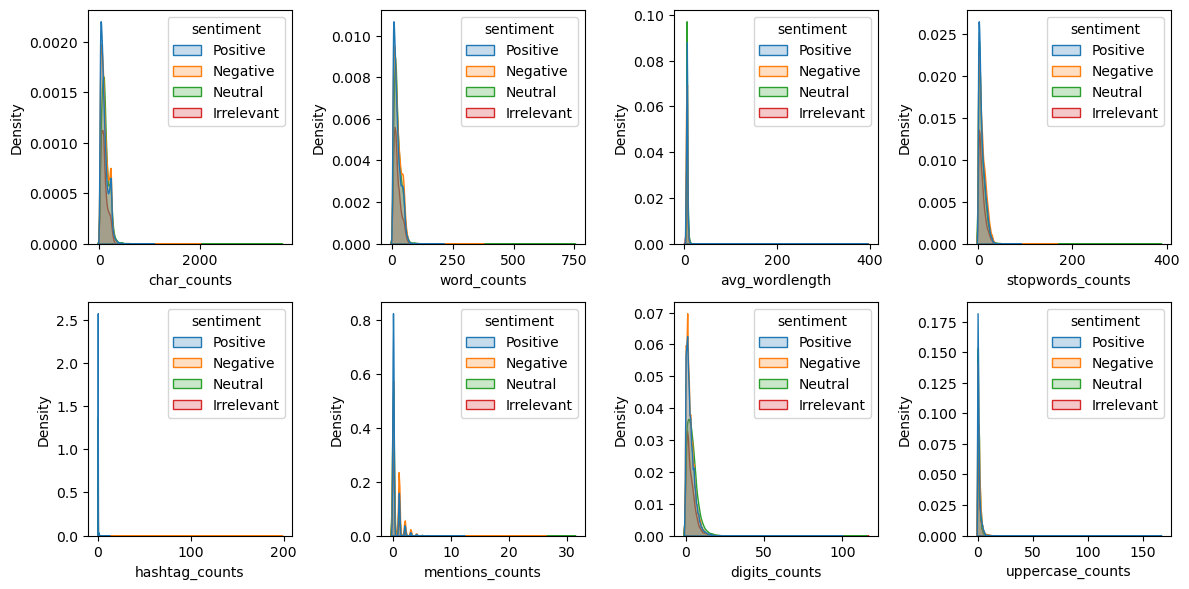

In [86]:
plt.figure(figsize = (12,6))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=True)
    
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

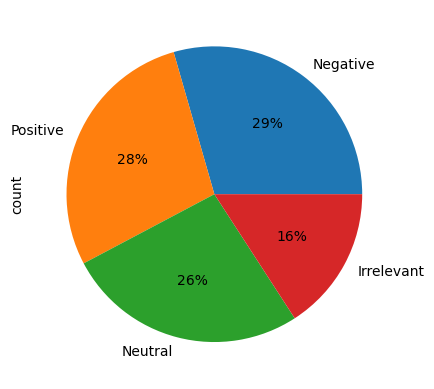

In [87]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [88]:
# wordcloud visualization
stopwords = list(STOPWORDS)
stopwords

['we',
 'by',
 'below',
 'their',
 'for',
 'off',
 'theirs',
 'however',
 "we'd",
 'about',
 'once',
 'while',
 'those',
 'can',
 'her',
 'at',
 'own',
 'yourself',
 'most',
 'ours',
 'few',
 'he',
 "they've",
 "we're",
 'had',
 "wouldn't",
 'itself',
 "why's",
 'such',
 'in',
 'through',
 'during',
 'after',
 'otherwise',
 'until',
 "how's",
 "he'd",
 "it's",
 'not',
 'could',
 "didn't",
 'more',
 'hers',
 'i',
 'r',
 "you've",
 "shouldn't",
 'have',
 'ought',
 'out',
 'was',
 "aren't",
 "here's",
 'or',
 'she',
 'which',
 "isn't",
 "haven't",
 "shan't",
 'herself',
 "i'm",
 'into',
 "she's",
 "what's",
 "where's",
 'hence',
 "i'll",
 'else',
 "i'd",
 'doing',
 'they',
 'no',
 'also',
 'an',
 'too',
 'shall',
 'has',
 'other',
 'your',
 'between',
 'where',
 'than',
 "she'll",
 'on',
 "hasn't",
 "who's",
 'there',
 'both',
 'been',
 'should',
 "i've",
 "let's",
 "that's",
 "hadn't",
 'here',
 'just',
 'under',
 'themselves',
 "doesn't",
 'yourselves',
 "can't",
 'above',
 'are',
 "the

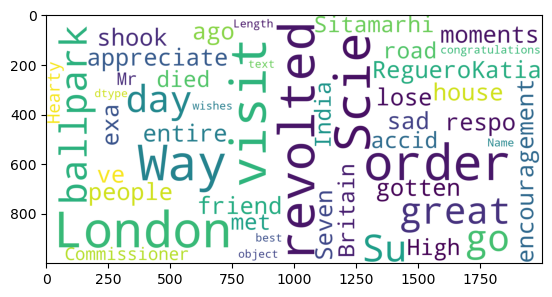

In [89]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)


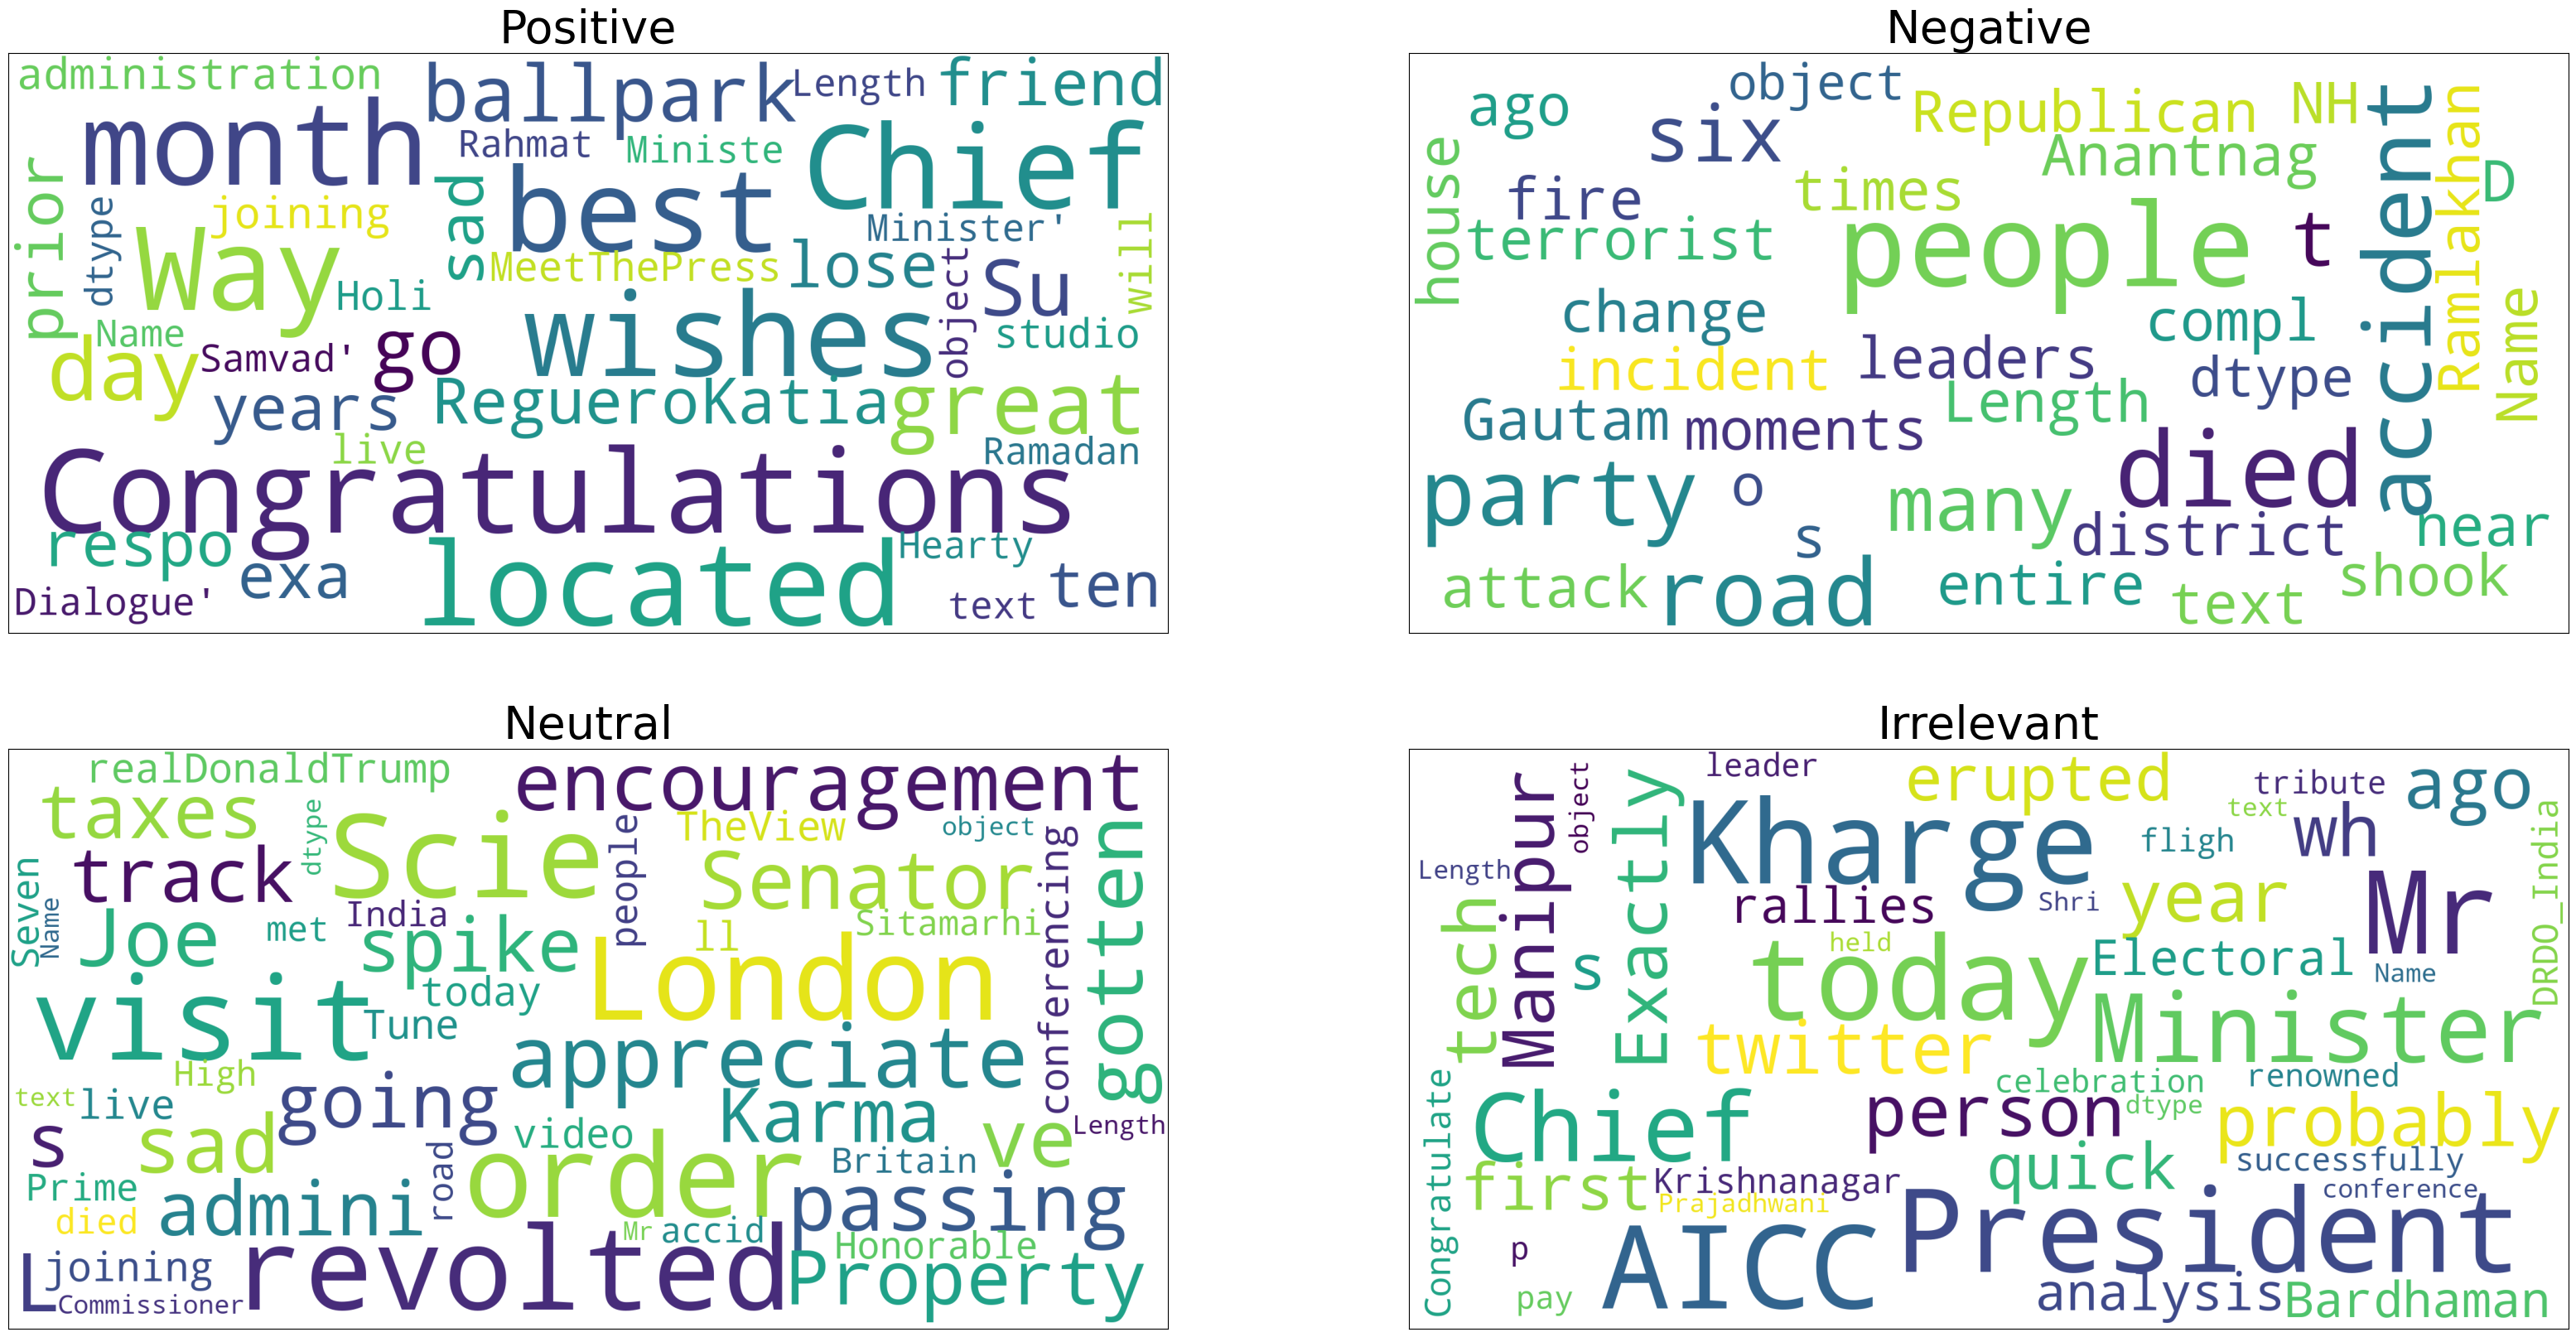

In [90]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    df1 = df[df['sentiment'] == sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df1))
    plt.imshow(wordcloud)
    plt.xticks([])    
    plt.yticks([])
    plt.title(sent, fontsize = 40)

In [91]:
# data cleaning

In [92]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [93]:
# train test split

In [94]:

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)

In [95]:
x_train.shape, x_test.shape

((65161,), (16291,))

In [96]:
# model building and testing

In [97]:

clf = Pipeline([('tfid', TfidfVectorizer(stop_words=stopwords)),
                ('rfc', RandomForestClassifier(n_jobs=1))])
clf.fit(x_train, y_train)


Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['we', 'by', 'below', 'their',
                                             'for', 'off', 'theirs', 'however',
                                             "we'd", 'about', 'once', 'while',
                                             'those', 'can', 'her', 'at', 'own',
                                             'yourself', 'most', 'ours', 'few',
                                             'he', "they've", "we're", 'had',
                                             "wouldn't", 'itself', "why's",
                                             'such', 'in', ...])),
                ('rfc', RandomForestClassifier(n_jobs=1))])

In [98]:
# evaluation 

In [99]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.85      0.90      2490
    Negative       0.92      0.92      0.92      4959
     Neutral       0.86      0.89      0.88      4243
    Positive       0.89      0.91      0.90      4599

    accuracy                           0.90     16291
   macro avg       0.91      0.89      0.90     16291
weighted avg       0.90      0.90      0.90     16291



In [100]:
# save this model


In [101]:
pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [102]:
clf.predict(['you are not that good'])

array(['Positive'], dtype=object)